**Table of contents**<a id='toc0_'></a>    
- [Gestion de l'envrionnement de travail.](#toc1_)    
  - [Import des données](#toc1_1_)    
- [Préparation des données et étude statistique](#toc2_)    
  - [Génération de l'étiquette binaire "passoire énergétique"](#toc2_1_)    
  - [Traitement des données manquantes.](#toc2_2_)    
  - [Analyse des distributions](#toc2_3_)    
  - [Analyse des corrélations entre les variables explicatives.](#toc2_4_)    
  - [Analyse des liens entre les varaibles explicatives et la variable cible](#toc2_5_)    
  - [Encodage des variables catégorielles](#toc2_6_)    
  - [Echantillonage](#toc2_7_)    
  - [Répartition des classes](#toc2_8_)    
  - [Affichage d'un extrait de X_train et X_test](#toc2_9_)    
- [Arbre de décision](#toc3_)    
  - [Lancer l'apprentissage](#toc3_1_)    
  - [Affichage de l'arbre de décision](#toc3_2_)    
  - [Predire sur l'échantillon test](#toc3_3_)    
  - [Evaluation du modèle](#toc3_4_)    
  - [Calcul du taux d'erreur.](#toc3_5_)    
  - [Calcul de la precision](#toc3_6_)    
  - [Calculer ces métriques avec l'approche macro non pondéré](#toc3_7_)    
  - [Calculer ces métriques avec l'approche macro pondéré](#toc3_8_)    
  - [Validation croisée](#toc3_9_)    
  - [Optimisation de paramètres](#toc3_10_)    
  - [Aprentissage avec grid search](#toc3_11_)    
  - [Afficher le meilleur modèle](#toc3_12_)    
  - [Prédire avec la meilleure combinaison de paramètres.](#toc3_13_)    
  - [Evaluer le modèle avec la meilleure combinaison de paramètres](#toc3_14_)    
  - [Courbe ROC pour comparer les modèles.](#toc3_15_)    
- [D'autres méthodes](#toc4_)    
  - [KNN](#toc4_1_)    
  - [Regression logistique](#toc4_2_)    
  - [Random Forest](#toc4_3_)    
  - [Aller plus loin avec SMOTE pour ré équilibrer les classes](#toc4_4_)    
    - [Méthode SMOTE](#toc4_4_1_)    
    - [Méthode BorderlineSMOTE](#toc4_4_2_)    
  - [Méthode SHAP pour l'interprétation des modèles.](#toc4_5_)    
- [Regression](#toc5_)    
  - [Variables explicatives](#toc5_1_)    
  - [Statistique des variables explicatives](#toc5_2_)    
  - [Inspecter les données manquantes](#toc5_3_)    
  - [Imputation des Données Manquantes sur variable quantitatives](#toc5_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Gestion de l'envrionnement de travail.](#toc0_)

In [18]:
# Import des librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    GridSearchCV,
    cross_val_predict,
    cross_val_score,
    train_test_split,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


## <a id='toc1_1_'></a>[Import des données](#toc0_)

In [95]:
# Import des données
df = pd.read_csv("data/dpe-v2-logements-existants.csv")

/var/folders/vm/277zr2vx0wv9k3k3scsf5mh00000gn/T/ipykernel_3325/4095390796.py:2: DtypeWarning:

Columns (12,48,190,191,192,193) have mixed types. Specify dtype option on import or set low_memory=False.



In [97]:
# Affichage de la répartition des étiquettes DPE
df["Etiquette_DPE"].value_counts(normalize=True)

Etiquette_DPE
C    0.347564
D    0.337046
E    0.209845
F    0.062107
G    0.034290
B    0.008837
A    0.000311
Name: proportion, dtype: float64

# <a id='toc2_'></a>[Préparation des données et étude statistique](#toc0_)

## <a id='toc2_1_'></a>[Génération de l'étiquette binaire "passoire énergétique"](#toc0_)

In [99]:
df["passoire_energetique"] = df["Etiquette_DPE"].isin(["F", "G"])

## <a id='toc2_2_'></a>[Traitement des données manquantes.](#toc0_)

In [ ]:
# Vérification des données manquantes
# Vérification des données manquantes
ls_variables_explicatives = [
    "Année_construction",
    "Surface_habitable_logement",
    "Coût_total_5_usages",
    "Coût_ECS",
    "Coût_chauffage",
    "Coût_éclairage",
    "Coût_auxiliaires",
    "Coût_refroidissement",
    "Type_énergie_n°1",
]

In [102]:
df

,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Surface_climatisée,Type_énergie_climatisation,Catégorie_ENR,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Production_électricité_PV_(kWhep/an),Surface_totale_capteurs_photovoltaïque,Nombre_module,passoire_energetique
0,2369E1626603K,2023-05-17,2023-05-16,2023-05-15,DPE 3CL 2021 méthode logement,NaN,2033-05-15,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,False
1,2469E2448797H,2024-07-06,2024-07-05,2024-07-03,DPE 3CL 2021 méthode logement,NaN,2034-07-04,2.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,False
2,2469E1154509Z,2024-03-29,2024-03-28,2024-03-28,DPE 3CL 2021 méthode logement,NaN,2034-03-27,2.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,True
3,2269E1396880W,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,False
4,2269E1396877T,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16064,2369E2954339E,2023-09-06,2023-05-23,2023-05-23,DPE 3CL 2021 méthode logement,2369E2085485S,2033-05-22,2.3,NaN,0.0,...,NaN,NaN,panneaux solaires thermiques,NaN,Solaire Photovoltaïque,0.0,0.0,NaN,NaN,False
16065,2369E2586828D,2023-07-31,2023-07-30,2023-07-30,DPE 3CL 2021 méthode logement,NaN,2033-07-29,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,False
16066,2369E3098145E,2023-09-18,2023-09-17,2023-09-11,DPE 3CL 2021 méthode logement,2369E3035921Y,2033-09-16,2.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,False
16067,2369E2586714T,2023-07-31,2023-07-30,2023-07-30,DPE 3CL 2021 méthode logement,NaN,2033-07-29,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,False


In [103]:
# Vérification des données manquantes
df[ls_variables_explicatives].isnull().sum()
# Remplacer les valeurs NA par la moyenne des colonnes
for col in ls_variables_explicatives:
    try:
        df[col] = df[col].fillna(df[col].mean())
    except:
        print(f"Erreur sur la colonne {col}")

Erreur sur la colonne Type_énergie_n°1


## <a id='toc2_3_'></a>[Analyse des distributions](#toc0_)

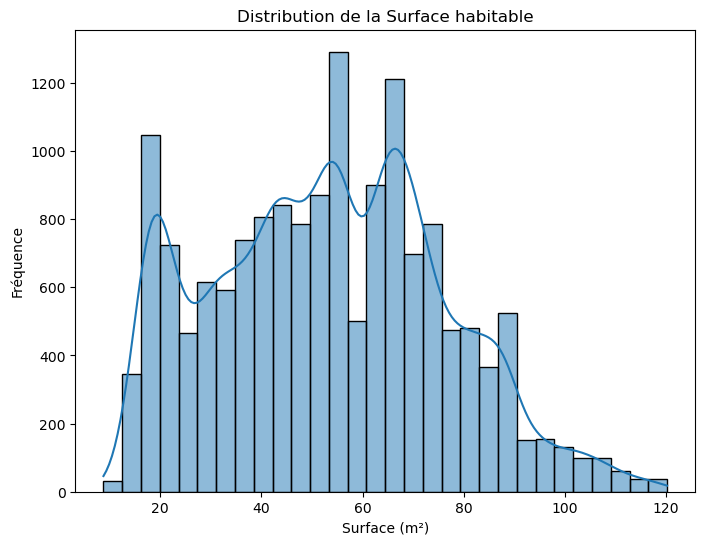

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suppression des outliers par la méthode interquartile
Q1 = df["Surface_habitable_logement"].quantile(0.25)
Q3 = df["Surface_habitable_logement"].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - (1.5 * IQR)
borne_sup = Q3 + (1.5 * IQR)

surface_without_outliers = df[
    (df["Surface_habitable_logement"] < borne_sup)
    & (df["Surface_habitable_logement"] > borne_inf)
].loc[:, "Surface_habitable_logement"]


# Distribution de la surface
plt.figure(figsize=(8, 6))
sns.histplot(surface_without_outliers, bins=30, kde=True)
plt.title("Distribution de la Surface habitable")
plt.xlabel("Surface (m²)")
plt.ylabel("Fréquence")
plt.show()

In [106]:
surface_without_outliers = px.data.tips()
fig = px.histogram(df, x="Surface_habitable_logement")
fig.show()

## <a id='toc2_4_'></a>[Analyse des corrélations entre les variables explicatives.](#toc0_)

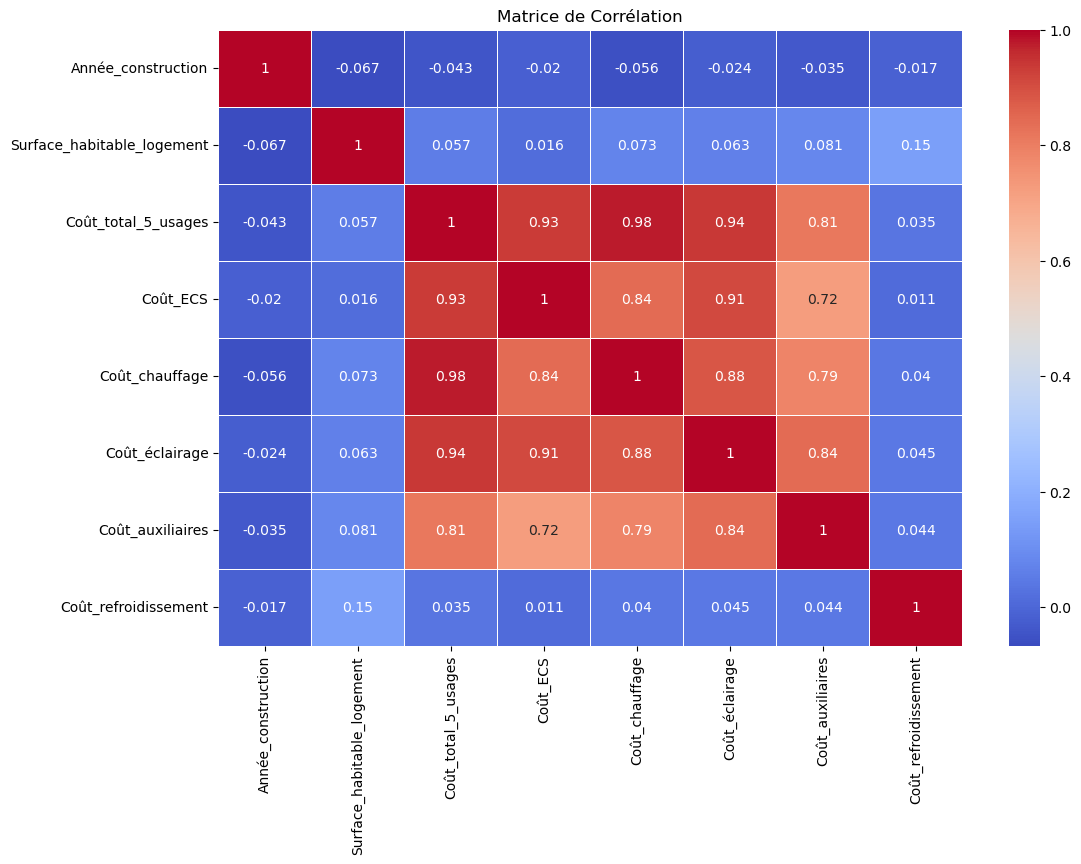

In [107]:
# Calcul de la matrice de corrélation
corr_matrix = df[ls_variables_explicatives[:-1]].corr()

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

## <a id='toc2_5_'></a>[Analyse des liens entre les varaibles explicatives et la variable cible](#toc0_)

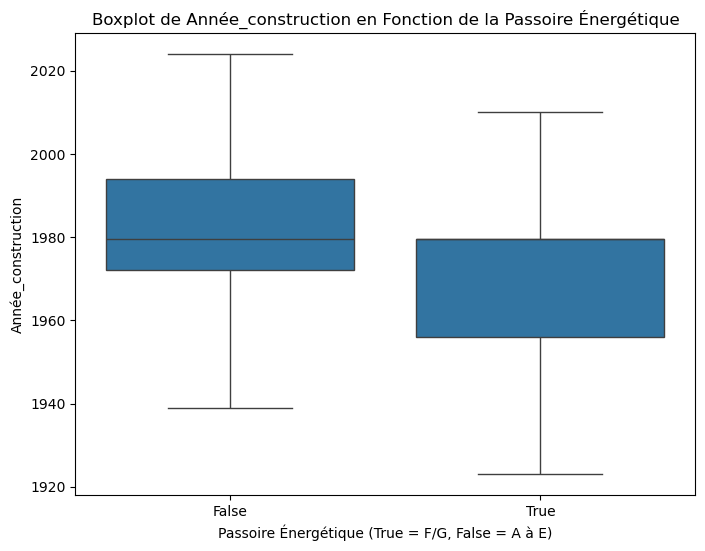

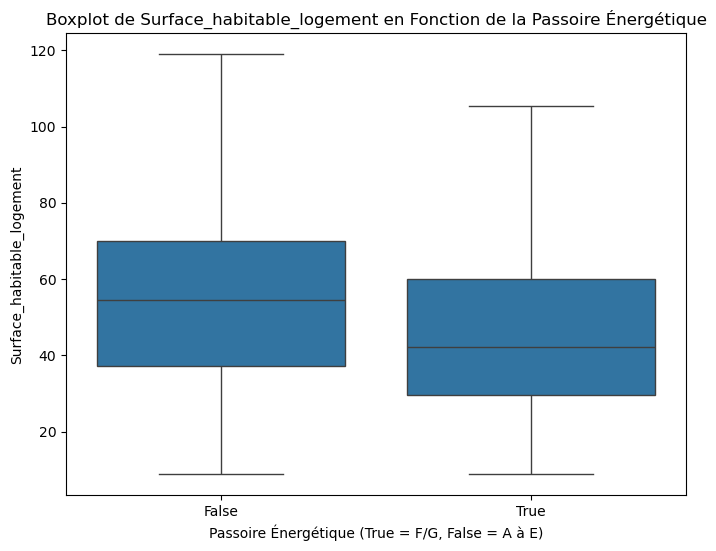

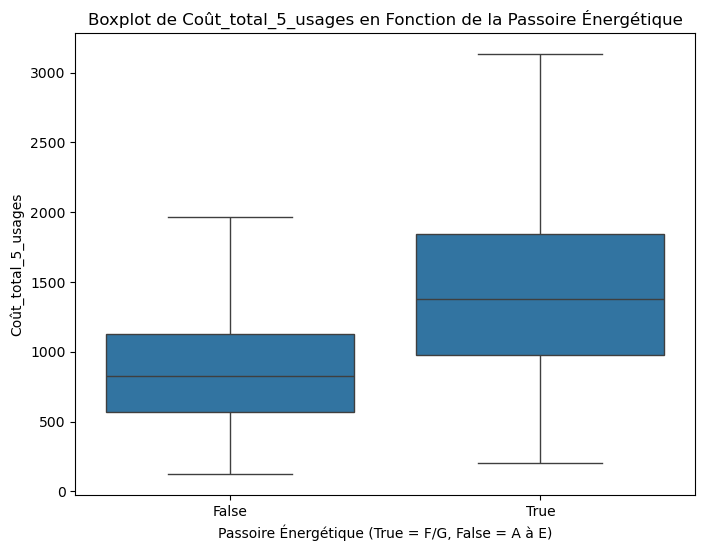

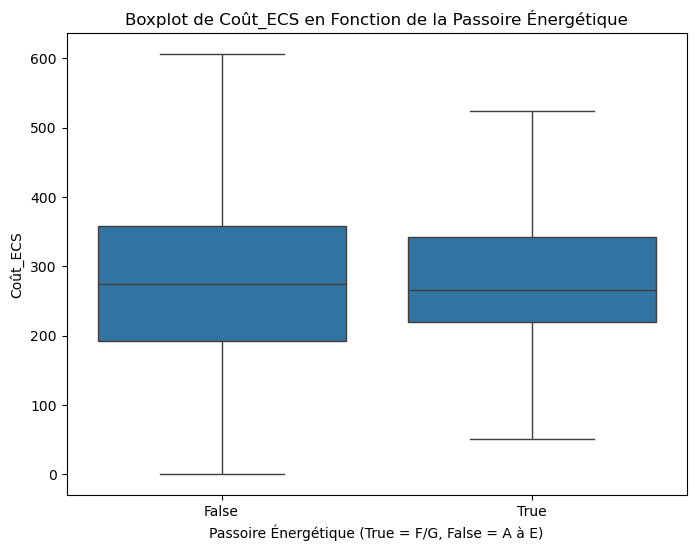

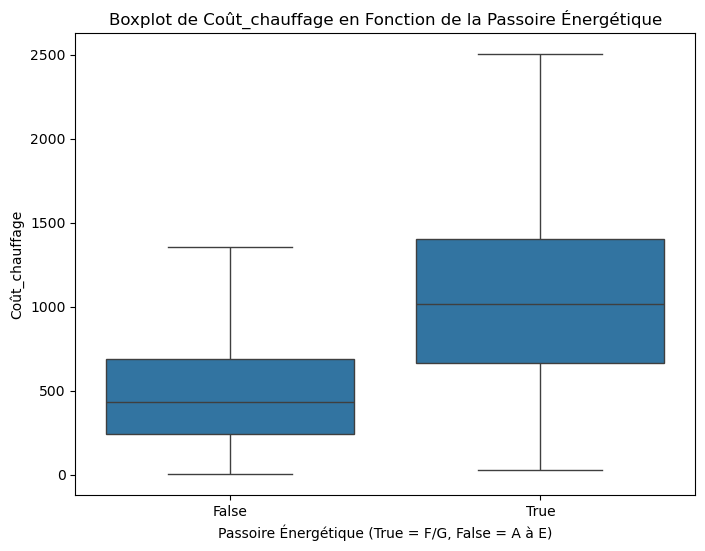

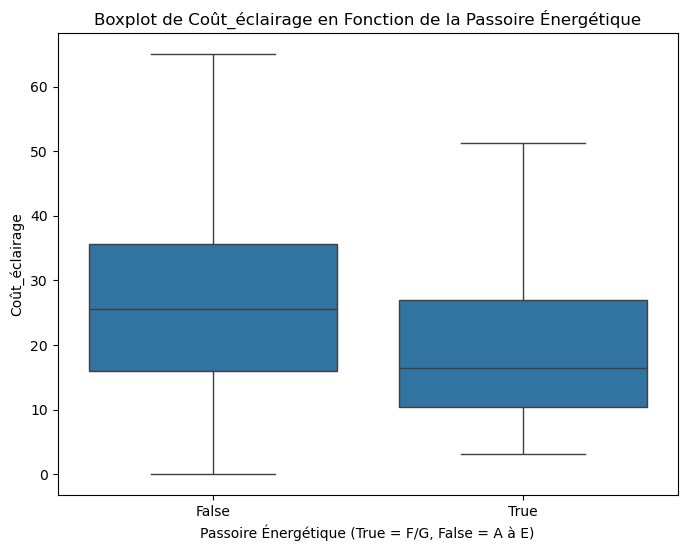

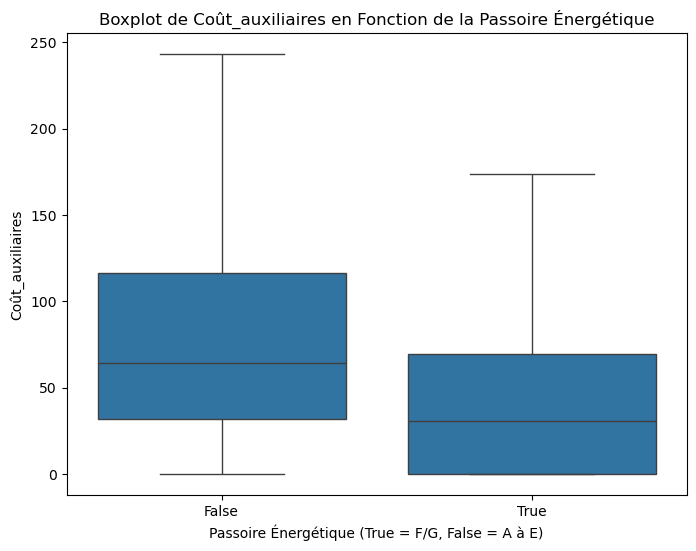

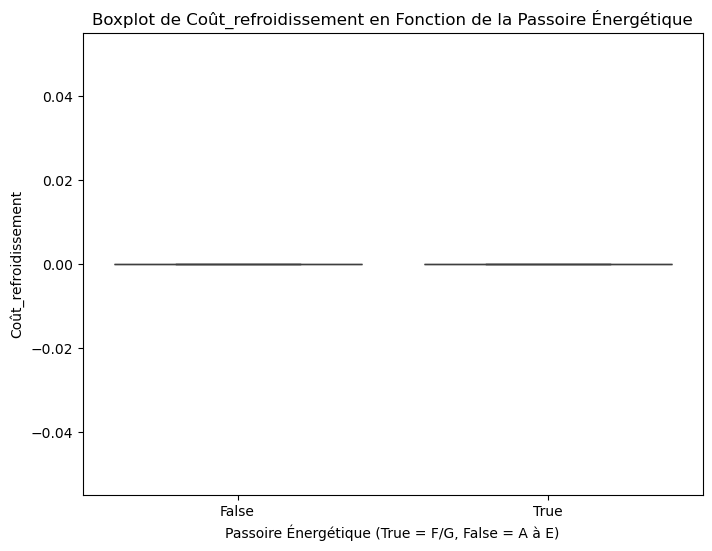

In [108]:
# Boxplot de chaque variable explicative par rapport à la passoire énergétique
for col in ls_variables_explicatives[:-1]:
    plt.figure(figsize=(8, 6))

    # Tracer le boxplot sans les outliers
    sns.boxplot(x="passoire_energetique", y=col, data=df, showfliers=False)

    # Automatiser le titre avec le nom de la colonne
    plt.title(f"Boxplot de {col} en Fonction de la Passoire Énergétique")

    plt.xlabel("Passoire Énergétique (True = F/G, False = A à E)")
    plt.ylabel(f"{col}")  # Automatiser l'étiquette de l'axe y avec le nom de la colonne
    plt.show()

## <a id='toc2_6_'></a>[Encodage des variables catégorielles](#toc0_)


In [110]:
# Concaténer les deux listes : ls_variables_explicatives et ['passoire_energetique']
df = df[ls_variables_explicatives + ["passoire_energetique"]]
df = pd.get_dummies(df, columns=["Type_énergie_n°1"], drop_first=True)

## <a id='toc2_7_'></a>[Echantillonage](#toc0_)

In [111]:
# Utiliser set.difference() pour exclure la colonne cible de ls_variables_explicatives
X = df[df.columns.difference(["passoire_energetique"])]
Y = df["passoire_energetique"]

In [112]:
# Génération des ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, stratify=Y, random_state=42
)

## <a id='toc2_8_'></a>[Répartition des classes](#toc0_)

In [113]:
y_train.value_counts(normalize=True)

passoire_energetique
False    0.903627
True     0.096373
Name: proportion, dtype: float64

In [114]:
y_test.value_counts(normalize=True)

passoire_energetique
False    0.903547
True     0.096453
Name: proportion, dtype: float64

## <a id='toc2_9_'></a>[Affichage d'un extrait de X_train et X_test](#toc0_)

In [115]:
print(X_train.shape)
print(X_test.shape)
X_test.head()


(11248, 15)
(4821, 15)


,Année_construction,Coût_ECS,Coût_auxiliaires,Coût_chauffage,Coût_refroidissement,Coût_total_5_usages,Coût_éclairage,Surface_habitable_logement,Type_énergie_n°1_Bois – Granulés (pellets) ou briquettes,Type_énergie_n°1_Bois – Plaquettes forestières,Type_énergie_n°1_Fioul domestique,Type_énergie_n°1_GPL,Type_énergie_n°1_Gaz naturel,Type_énergie_n°1_Réseau de Chauffage urbain,Type_énergie_n°1_Électricité
3777,1959.000000,219.6,179.0,725.6,0.0,1159.3,35.1,65.0,False,False,False,False,False,True,False
9541,1979.510191,199.5,95.0,138.9,0.0,468.4,35.1,65.0,False,False,False,False,True,False,False
11913,2020.000000,189.6,36.7,210.0,0.0,468.3,32.1,59.5,False,False,False,False,False,True,False
5298,1948.000000,353.1,49.3,530.9,0.0,954.3,20.9,64.4,False,False,False,False,False,False,True
6080,1979.510191,258.1,38.7,250.2,0.0,557.9,10.8,30.0,False,False,False,False,False,False,True


# <a id='toc3_'></a>[Arbre de décision](#toc0_)

## <a id='toc3_1_'></a>[Lancer l'apprentissage](#toc0_)

In [116]:
model_arbre = DecisionTreeClassifier(
    max_depth=3, min_samples_leaf=50, min_samples_split=100
)
model_arbre = model_arbre.fit(X_train, y_train)

## <a id='toc3_2_'></a>[Affichage de l'arbre de décision](#toc0_)

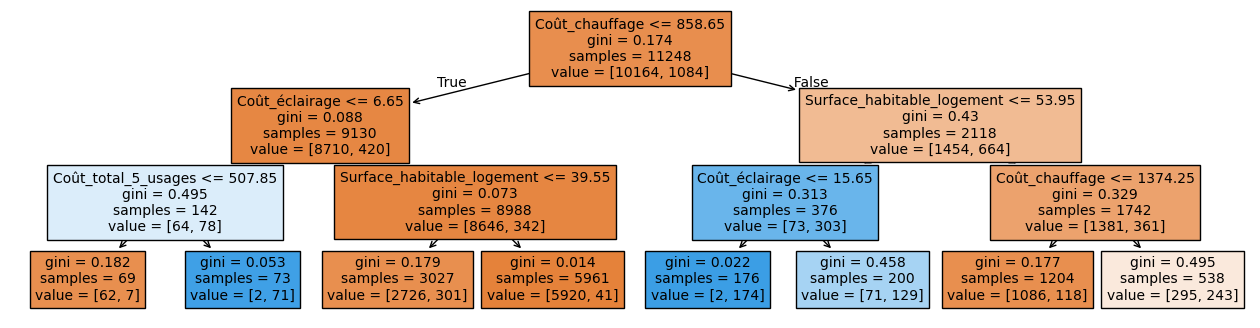

In [117]:
plt.figure(figsize=(16, 4))
plot_tree(model_arbre, feature_names=list(X.columns), filled=True, fontsize=10)
plt.show()

## <a id='toc3_3_'></a>[Predire sur l'échantillon test](#toc0_)

In [118]:
y_pred = model_arbre.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False], shape=(4821,))

In [119]:
# Evaluation des probabilités
y_pred_proba = model_arbre.predict_proba(X_test)
y_pred_proba[0:10]

array([[0.99312196, 0.00687804],
       [0.99312196, 0.00687804],
       [0.99312196, 0.00687804],
       [0.99312196, 0.00687804],
       [0.90056161, 0.09943839],
       [0.99312196, 0.00687804],
       [0.99312196, 0.00687804],
       [0.02739726, 0.97260274],
       [0.99312196, 0.00687804],
       [0.54832714, 0.45167286]])

## <a id='toc3_4_'></a>[Evaluation du modèle](#toc0_)

In [120]:
mc = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=["pred_0", "pred_1"],
    index=["obs_0", "obs_1"],
)

mc

# ou

pd.crosstab(y_test, y_pred, colnames=["pred"], rownames=["obs"], margins=True)

pred,False,True,All
obs,,,
False,4326,30,4356
True,289,176,465
All,4615,206,4821


## <a id='toc3_5_'></a>[Calcul du taux d'erreur.](#toc0_)

In [121]:
1 - accuracy_score(y_test, y_pred)

0.06616884463804185

## <a id='toc3_6_'></a>[Calcul de la precision](#toc0_)

In [122]:
print(
    "precision : " + str(precision_score(y_test, y_pred, average="binary", pos_label=0))
)

precision : 0.9373781148429036


In [123]:
print("recall :" + str(recall_score(y_test, y_pred, average="binary", pos_label=0)))

recall :0.9931129476584022


F1-Score

In [124]:
print("f1_score : " + str(f1_score(y_test, y_pred, average="binary", pos_label=0)))

f1_score : 0.9644409764797681


## <a id='toc3_7_'></a>[Calculer ces métriques avec l'approche macro non pondéré](#toc0_)

In [125]:
print("recall : " + str(recall_score(y_test, y_pred, average="macro")))
print("precision : " + str(precision_score(y_test, y_pred, average="macro")))
print("f1_score : " + str(f1_score(y_test, y_pred, average="macro")))

recall : 0.685803785657158
precision : 0.8958735234408692
f1_score : 0.7445155702070971


## <a id='toc3_8_'></a>[Calculer ces métriques avec l'approche macro pondéré](#toc0_)

In [126]:
print("recall : " + str(recall_score(y_test, y_pred, average="weighted")))
print("precision : " + str(precision_score(y_test, y_pred, average="weighted")))
print("f1_score : " + str(f1_score(y_test, y_pred, average="weighted")))

recall : 0.9338311553619582
precision : 0.9293716286359149
f1_score : 0.9220160381197632


## <a id='toc3_9_'></a>[Validation croisée](#toc0_)

In [127]:
# Création d'un modèle d'arbre de décision
model_arbre_cv = DecisionTreeClassifier(random_state=42)

# Mise en œuvre de la validation croisée
# Ici, nous utilisons une validation croisée à 5 plis
cv_scores = cross_val_score(model_arbre_cv, X_train, y_train, cv=5, scoring="f1_macro")

# Affichage des scores de validation croisée
print(f"Scores de validation croisée : {cv_scores}")
print(f"Moyenne des scores de validation croisée : {cv_scores.mean()}")

# Entraînement du modèle sur l'ensemble d'entraînement
model_arbre_cv.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_arbre_cv = model_arbre_cv.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred_arbre_cv))
print(f"Accuracy sur l'ensemble de test : {accuracy_score(y_test, y_pred_arbre_cv)}")

Scores de validation croisée : [0.91110584 0.87095481 0.88112341 0.89779137 0.88286153]
Moyenne des scores de validation croisée : 0.8887673928377294
              precision    recall  f1-score   support

       False       0.98      0.98      0.98      4356
        True       0.82      0.82      0.82       465

    accuracy                           0.96      4821
   macro avg       0.90      0.90      0.90      4821
weighted avg       0.96      0.96      0.96      4821

Accuracy sur l'ensemble de test : 0.9645301804604853


## <a id='toc3_10_'></a>[Optimisation de paramètres](#toc0_)

In [132]:
# cette fois-ci on utilise numpy pour générer des séquences à la place des listes
parameters = {
    "max_depth": np.arange(start=1, stop=10, step=1),
    "min_samples_leaf": np.arange(start=5, stop=250, step=50),
    "min_samples_split": np.arange(start=10, stop=500, step=50),
}
# Calculer le nombre de valeurs pour chaque paramètre
total_combinaisons = (
    len(parameters["max_depth"])
    * len(parameters["min_samples_leaf"])
    * len(parameters["min_samples_split"])
)

print(f"Nombre total de modèles à tester: {total_combinaisons}")

Nombre total de modèles à tester: 450


## <a id='toc3_11_'></a>[Aprentissage avec grid search](#toc0_)

In [133]:
model_arbre_grid = DecisionTreeClassifier()
score = make_scorer(f1_score, pos_label=0)
model_arbre_grid = GridSearchCV(
    model_arbre_grid, parameters, scoring=score, verbose=2, cv=5
)
model_arbre_grid.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=60; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=110; total time=   0.0s
[CV] END max_depth=1, 

,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': array([1, 2, ..., 6, 7, 8, 9]), 'min_samples_leaf': array([ 5, ...05, 155, 205]), 'min_samples_split': array([ 10, ...60, 410, 460])}"
,scoring,"make_scorer(f..., pos_label=0)"
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


## <a id='toc3_12_'></a>[Afficher le meilleur modèle](#toc0_)

In [134]:
print(
    "Voici les paramètres du meilleure modèle : "
    + str(model_arbre_grid.best_estimator_)
)
print(
    "Voici le "
    + str(model_arbre_grid.scorer_)
    + " du meilleure modèle : "
    + str(model_arbre_grid.best_score_)
)

Voici les paramètres du meilleure modèle : DecisionTreeClassifier(max_depth=np.int64(8), min_samples_leaf=np.int64(5),
                       min_samples_split=np.int64(10))
Voici le make_scorer(f1_score, response_method='predict', pos_label=0) du meilleure modèle : 0.979394566566377


## <a id='toc3_13_'></a>[Prédire avec la meilleure combinaison de paramètres.](#toc0_)

In [135]:
# Prédictions sur l'ensemble de test avec le meilleur modèle
y_pred_arbre_grid = model_arbre_grid.predict(X_test)

## <a id='toc3_14_'></a>[Evaluer le modèle avec la meilleure combinaison de paramètres](#toc0_)

In [136]:
# Évaluation du modèle
print(classification_report(y_test, y_pred_arbre_grid))
print(f"Accuracy sur l'ensemble de test : {accuracy_score(y_test, y_pred_arbre_grid)}")
print(
    "recall :"
    + str(recall_score(y_test, y_pred_arbre_grid, average="binary", pos_label=0))
)
print(
    "precision : "
    + str(precision_score(y_test, y_pred_arbre_grid, average="binary", pos_label=0))
)
print(
    "f1_score : "
    + str(f1_score(y_test, y_pred_arbre_grid, average="binary", pos_label=0))
)

              precision    recall  f1-score   support

       False       0.97      0.98      0.98      4356
        True       0.83      0.76      0.80       465

    accuracy                           0.96      4821
   macro avg       0.90      0.87      0.89      4821
weighted avg       0.96      0.96      0.96      4821

Accuracy sur l'ensemble de test : 0.9620410703173615
recall :0.9832415059687787
precision : 0.974960163897109
f1_score : 0.9790833238084352


## <a id='toc3_15_'></a>[Courbe ROC pour comparer les modèles.](#toc0_)

In [137]:
# Prédire les probabilités pour la classe positive (1)
y_proba_cv = model_arbre_cv.predict_proba(X_test)[:, 1]
y_proba_grid = model_arbre_grid.predict_proba(X_test)[:, 1]

In [138]:
# Calculer les courbes ROC
fpr1, tpr1, _ = roc_curve(y_test, y_proba_cv)
fpr2, tpr2, _ = roc_curve(y_test, y_proba_grid)

# Calculer l'AUC pour chaque modèle (Area Under the Curve)
auc1 = roc_auc_score(y_test, y_proba_cv)
auc2 = roc_auc_score(y_test, y_proba_grid)

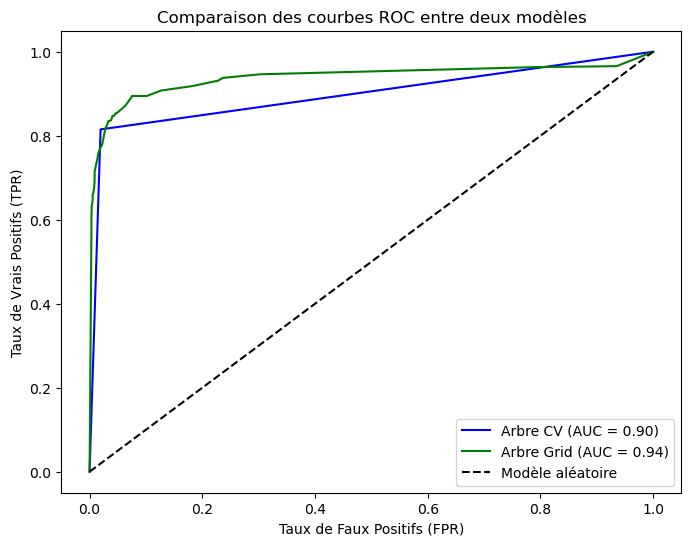

In [139]:
# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label=f"Arbre CV (AUC = {auc1:.2f})", color="blue")
plt.plot(fpr2, tpr2, label=f"Arbre Grid (AUC = {auc2:.2f})", color="green")

# Ajouter la diagonale (aléatoire)
plt.plot([0, 1], [0, 1], "k--", label="Modèle aléatoire")

# Ajouter des labels et un titre
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Comparaison des courbes ROC entre deux modèles")
plt.legend(loc="lower right")

# Afficher le graphique
plt.show()

# <a id='toc4_'></a>[D'autres méthodes](#toc0_)

## <a id='toc4_1_'></a>[KNN](#toc0_)

In [140]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
print("f1_score : " + str(f1_score(y_test, y_pred_knn, average="binary", pos_label=1)))

f1_score : 0.6491428571428571


## <a id='toc4_2_'></a>[Regression logistique](#toc0_)

In [141]:
# Modélisation
reg_log = LogisticRegression()
reg_log_model = reg_log.fit(X_train, y_train)
y_pred_reg = reg_log_model.predict(X_test)

print("f1_score : " + str(f1_score(y_test, y_pred_reg, average="binary", pos_label=1)))

f1_score : 0.49293563579277866


/opt/miniconda3/envs/data_science/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning:

lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [142]:
# Affichage des probabilités d'appartenance aux classes.
reg_log_model.predict_proba(X_test)[0:10]

array([[9.89799264e-01, 1.02007356e-02],
       [9.95913562e-01, 4.08643754e-03],
       [9.86719897e-01, 1.32801034e-02],
       [9.47799541e-01, 5.22004585e-02],
       [9.06215206e-01, 9.37847940e-02],
       [9.95455429e-01, 4.54457113e-03],
       [9.99194940e-01, 8.05060193e-04],
       [7.95803377e-01, 2.04196623e-01],
       [9.96627511e-01, 3.37248894e-03],
       [1.14710682e-01, 8.85289318e-01]])

In [143]:
# Afficher les coefficients du modèle.
coef = pd.DataFrame(reg_log_model.coef_[0,], index=X_train.columns, columns=["Coef"])
coef.loc["Constante"] = reg_log_model.intercept_
coef

,Coef
Année_construction,-5.312698e-04
Coût_ECS,1.023150e-02
Coût_auxiliaires,-4.689115e-05
Coût_chauffage,1.458742e-02
Coût_refroidissement,3.784160e-03
Coût_total_5_usages,-1.135962e-02
Coût_éclairage,-5.616528e-02
Surface_habitable_logement,-1.870578e-02
Type_énergie_n°1_Bois – Granulés (pellets) ou briquettes,-3.209729e-06
Type_énergie_n°1_Bois – Plaquettes forestières,-8.033388e-07


## <a id='toc4_3_'></a>[Random Forest](#toc0_)


In [144]:
# Modéliser avec une forêt aléatoire.
rf_clf = RandomForestClassifier(random_state=0)
rf_model = rf_clf.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("f1_score : " + str(f1_score(y_test, y_pred_rf, average="binary", pos_label=1)))

pd.crosstab(y_test, y_pred, colnames=["pred"], rownames=["obs"], margins=True)

f1_score : 0.8467836257309942


pred,False,True,All
obs,,,
False,4326,30,4356
True,289,176,465
All,4615,206,4821


In [145]:
# Analyser les variables les plus importantes.
pd.DataFrame(
    rf_model.feature_importances_,
    index=X_train.columns.tolist(),
    columns=["Importances"],
).sort_values(by="Importances", ascending=False)

,Importances
Coût_chauffage,2.323168e-01
Coût_total_5_usages,1.913871e-01
Coût_éclairage,1.740251e-01
Surface_habitable_logement,1.525353e-01
Coût_auxiliaires,8.814406e-02
Coût_ECS,7.822578e-02
Année_construction,4.693793e-02
Type_énergie_n°1_Électricité,1.066082e-02
Type_énergie_n°1_Gaz naturel,7.949716e-03
Type_énergie_n°1_Réseau de Chauffage urbain,7.528690e-03


## <a id='toc4_4_'></a>[Aller plus loin avec SMOTE pour ré équilibrer les classes](#toc0_)

### <a id='toc4_4_1_'></a>[Méthode SMOTE](#toc0_)

Permet de creer des points artificiels entre les points existants de la classe minoritaire. (pondéré par un coefficient lamda de prise en compte de points vosin). Reéquilibrage total des classes.
$$x_{\text{synthetic}} = x_i + \lambda \times (x_{\text{voisin}} - x_i), \quad \lambda \in [0,1]$$

In [146]:
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

### <a id='toc4_4_2_'></a>[Méthode BorderlineSMOTE](#toc0_)

Similaire à SMOTE mais l'ajout des points est effectué proche des frontières de decision où les points minoritaires sont proches des points de classe majoritaire. Cela permet d'aider la discrimination sur les zones "difficiles" du dataset.

In [147]:
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [148]:
# Comparaison des fréquences de classes avant/après smote.
y_train.value_counts()

passoire_energetique
False    10164
True      1084
Name: count, dtype: int64

In [149]:
# Après oversampling SMOTE
y_train_smote.value_counts()

passoire_energetique
True     10164
False    10164
Name: count, dtype: int64

## <a id='toc4_5_'></a>[Méthode SHAP pour l'interprétation des modèles.](#toc0_)

Shapley Values proviennent de la théorie des jeux coopératifs. Elles permettent de mesurer l'importance de chaque joueur dans un jeu. Cette méthode s'applique aux caractéristiques d'un modèle, en cherchant à comprendre comment chaque caractéristique contribue aux prédictions d'un modèle.

SHAP est particulièrement utile car il :

- Interprète localement : Il explique comment une prédiction spécifique est obtenue pour une observation donnée.
- Interprète globalement : En moyenne, il montre l'importance des caractéristiques pour l'ensemble des prédictions.
- Considère les interactions : SHAP tient compte des interactions entre les caractéristiques, ce qui rend ses explications robustes.

In [150]:
# import shap

# # Créer un explainer basé sur le modèle Random Forest
# explainer = shap.TreeExplainer(rf_model)

# # Calculer les valeurs SHAP pour les données de test
# shap_values = explainer.shap_values(X_test)

In [151]:
# # Expliquer la première prédiction dans le jeu de test
# shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0])

In [152]:
# # Importance globale des caractéristiques (summary plot)
# shap.summary_plot(shap_values, X_test)

⚠️ Calculer les valeurs SHAP pour des modèles très complexes ou avec de très grandes données peut être coûteux en termes de temps.

# <a id='toc5_'></a>[Regression](#toc0_)

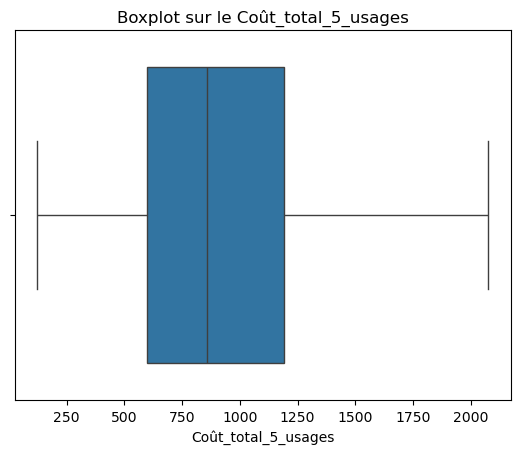

In [154]:
target = "Coût_total_5_usages"

# Créer un boxplot pour une colonne spécifique
sns.boxplot(data=df, x=target, showfliers=False)

# Afficher le graphique
plt.title(f"Boxplot sur le {target}")
plt.show()

In [155]:
# Créer une séquence de 0 à 1 avec un pas de 0.1
sequence = np.arange(0, 1.1, 0.1)

# Calculer les déciles (0.1, 0.2, ..., 0.9) en ajoutant les percentiles à describe()
resultat = df[target].describe(percentiles=sequence)

In [156]:
resultat

count     16069.000000
mean       1334.914712
std        6265.247975
min         123.000000
0%          123.000000
10%         425.000000
20%         533.000000
30%         645.940000
40%         760.000000
50%         859.100000
60%         984.980000
70%        1109.620000
80%        1276.580000
90%        1621.200000
100%     270187.300000
max      270187.300000
Name: Coût_total_5_usages, dtype: float64

## <a id='toc5_1_'></a>[Variables explicatives](#toc0_)

In [157]:
# Vérification des données manquantes
ls_variables_explicatives = [
    "Année_construction",
    "Période_construction",
    "Surface_habitable_logement",
    "Type_énergie_n°1",
    "Etiquette_DPE",
    "N°_étage_appartement",
    "Hauteur_sous-plafond",
    "Logement_traversant_(0/1)",
    "Présence_brasseur_air_(0/1)",
    "Indicateur_confort_été",
    "Isolation_toiture_(0/1)",
    "Protection_solaire_exterieure_(0/1)",
    "Inertie_lourde_(0/1)",
    "Deperditions_baies_vitrées",
    "Deperditions_enveloppe",
    "Déperditions_murs",
    "Deperditions_planchers_bas",
    "Deperditions_planchers_hauts",
    "Déperditions_ponts_thermiques",
    "Déperditions_portes",
    "Déperditions_renouvellement_air",
    "Qualité_isolation_enveloppe",
    "Qualité_isolation_menuiseries",
    "Qualité_isolation_murs",
    "Qualité_isolation_plancher_bas",
]

In [165]:
pd.read_csv("data/dpe-v2-logements-existants.csv")

/var/folders/vm/277zr2vx0wv9k3k3scsf5mh00000gn/T/ipykernel_3325/388288864.py:1: DtypeWarning:

Columns (12,48,190,191,192,193) have mixed types. Specify dtype option on import or set low_memory=False.



,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Appartement_non_visité_(0/1),...,Type_générateur_froid,Surface_climatisée,Type_énergie_climatisation,Catégorie_ENR,Electricité_PV_autoconsommée,Système_production_électricité_origine_renouvelable,Présence_production_PV_(0/1),Production_électricité_PV_(kWhep/an),Surface_totale_capteurs_photovoltaïque,Nombre_module
0,2369E1626603K,2023-05-17,2023-05-16,2023-05-15,DPE 3CL 2021 méthode logement,NaN,2033-05-15,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
1,2469E2448797H,2024-07-06,2024-07-05,2024-07-03,DPE 3CL 2021 méthode logement,NaN,2034-07-04,2.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,2469E1154509Z,2024-03-29,2024-03-28,2024-03-28,DPE 3CL 2021 méthode logement,NaN,2034-03-27,2.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,2269E1396880W,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,2269E1396877T,2022-06-22,2022-06-21,2022-06-20,DPE 3CL 2021 méthode logement,NaN,2032-06-20,2.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16064,2369E2954339E,2023-09-06,2023-05-23,2023-05-23,DPE 3CL 2021 méthode logement,2369E2085485S,2033-05-22,2.3,NaN,0.0,...,NaN,NaN,NaN,panneaux solaires thermiques,NaN,Solaire Photovoltaïque,0.0,0.0,NaN,NaN
16065,2369E2586828D,2023-07-31,2023-07-30,2023-07-30,DPE 3CL 2021 méthode logement,NaN,2033-07-29,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
16066,2369E3098145E,2023-09-18,2023-09-17,2023-09-11,DPE 3CL 2021 méthode logement,2369E3035921Y,2033-09-16,2.3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
16067,2369E2586714T,2023-07-31,2023-07-30,2023-07-30,DPE 3CL 2021 méthode logement,NaN,2033-07-29,2.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


## <a id='toc5_2_'></a>[Statistique des variables explicatives](#toc0_)

In [158]:
# Créer une séquence de 0 à 1 avec un pas de 0.1
sequence = np.arange(0, 1.1, 0.1)

# Calculer les déciles (0.1, 0.2, ..., 0.9) en ajoutant les percentiles à describe()
resultat = df.describe(percentiles=sequence)


In [159]:
resultat

,Année_construction,Surface_habitable_logement,Coût_total_5_usages,Coût_ECS,Coût_chauffage,Coût_éclairage,Coût_auxiliaires,Coût_refroidissement
count,16069.000000,16069.000000,16069.000000,16069.000000,16069.000000,16069.000000,16069.000000,16069.000000
mean,1979.510191,54.560229,1334.914712,403.243929,788.105439,36.846873,132.151490,2.187678
std,19.685227,26.002606,6265.247975,2104.761517,3772.098348,175.640201,528.964846,16.587986
min,1900.000000,8.800000,123.000000,0.000000,3.000000,0.000000,0.000000,0.000000
0%,1900.000000,8.800000,123.000000,0.000000,3.000000,0.000000,0.000000,0.000000
10%,1956.000000,20.480000,425.000000,147.500000,148.900000,8.900000,11.600000,0.000000
20%,1961.000000,31.000000,533.000000,181.000000,218.700000,13.000000,26.400000,0.000000
30%,1972.000000,40.200000,645.940000,205.340000,298.700000,17.100000,35.500000,0.000000
40%,1979.510191,47.000000,760.000000,241.320000,381.200000,21.300000,49.000000,0.000000
50%,1979.510191,54.000000,859.100000,273.000000,470.900000,24.400000,61.600000,0.000000


## <a id='toc5_3_'></a>[Inspecter les données manquantes](#toc0_)

In [166]:
# Rechargement du fichier complet
df = pd.read_csv("data/dpe-v2-logements-existants.csv")

/var/folders/vm/277zr2vx0wv9k3k3scsf5mh00000gn/T/ipykernel_3325/2754848690.py:2: DtypeWarning:

Columns (12,48,190,191,192,193) have mixed types. Specify dtype option on import or set low_memory=False.



In [167]:
# Vérification des données manquantes
df[ls_variables_explicatives].isnull().sum()

Année_construction                     5324
Période_construction                      0
Surface_habitable_logement              163
Type_énergie_n°1                          0
Etiquette_DPE                             0
N°_étage_appartement                   1739
Hauteur_sous-plafond                      0
Logement_traversant_(0/1)              6144
Présence_brasseur_air_(0/1)            6144
Indicateur_confort_été                 6144
Isolation_toiture_(0/1)                6258
Protection_solaire_exterieure_(0/1)    6144
Inertie_lourde_(0/1)                   6368
Deperditions_baies_vitrées               32
Deperditions_enveloppe                   32
Déperditions_murs                        32
Deperditions_planchers_bas               45
Deperditions_planchers_hauts             42
Déperditions_ponts_thermiques            34
Déperditions_portes                      37
Déperditions_renouvellement_air          32
Qualité_isolation_enveloppe               0
Qualité_isolation_menuiseries   

## <a id='toc5_4_'></a>[Imputation des Données Manquantes sur variable quantitatives](#toc0_)

In [169]:
from sklearn.impute import KNNImputer

# Sélectionner uniquement les colonnes quantitatives (numériques)
quant_cols = df[ls_variables_explicatives].select_dtypes(include=[np.number]).columns

# Afficher les colonnes quantitatives
print("Colonnes quantitatives :", quant_cols)

# Initialiser le KNNImputer
imputer = KNNImputer(n_neighbors=3)

# Appliquer l'imputation sur les colonnes quantitatives
df[quant_cols] = imputer.fit_transform(df[quant_cols])

# Vérification des données manquantes
df[quant_cols].isnull().sum()

Colonnes quantitatives : Index(['Année_construction', 'Surface_habitable_logement',
       'N°_étage_appartement', 'Hauteur_sous-plafond',
       'Logement_traversant_(0/1)', 'Présence_brasseur_air_(0/1)',
       'Isolation_toiture_(0/1)', 'Protection_solaire_exterieure_(0/1)',
       'Inertie_lourde_(0/1)', 'Deperditions_baies_vitrées',
       'Deperditions_enveloppe', 'Déperditions_murs',
       'Deperditions_planchers_bas', 'Deperditions_planchers_hauts',
       'Déperditions_ponts_thermiques', 'Déperditions_portes',
       'Déperditions_renouvellement_air'],
      dtype='object')


Année_construction                     0
Surface_habitable_logement             0
N°_étage_appartement                   0
Hauteur_sous-plafond                   0
Logement_traversant_(0/1)              0
Présence_brasseur_air_(0/1)            0
Isolation_toiture_(0/1)                0
Protection_solaire_exterieure_(0/1)    0
Inertie_lourde_(0/1)                   0
Deperditions_baies_vitrées             0
Deperditions_enveloppe                 0
Déperditions_murs                      0
Deperditions_planchers_bas             0
Deperditions_planchers_hauts           0
Déperditions_ponts_thermiques          0
Déperditions_portes                    0
Déperditions_renouvellement_air        0
dtype: int64

## Imputation des Données Manquantes sur variable qualitatives

In [ ]:
# Sélectionner toutes les colonnes non numériques (qualitatives)
categorical_cols = (
    df[ls_variables_explicatives].select_dtypes(exclude=[np.number]).columns
)

# Appliquer l'imputation par la valeur la plus fréquente (mode) pour chaque colonne catégorielle
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Vérification des données manquantes
df[categorical_cols].isnull().sum()

Période_construction              0
Type_énergie_n°1                  0
Etiquette_DPE                     0
Indicateur_confort_été            0
Qualité_isolation_enveloppe       0
Qualité_isolation_menuiseries     0
Qualité_isolation_murs            0
Qualité_isolation_plancher_bas    0
dtype: int64

## Analyse des Corrélations entre les Variables Explicatives et la variable cible

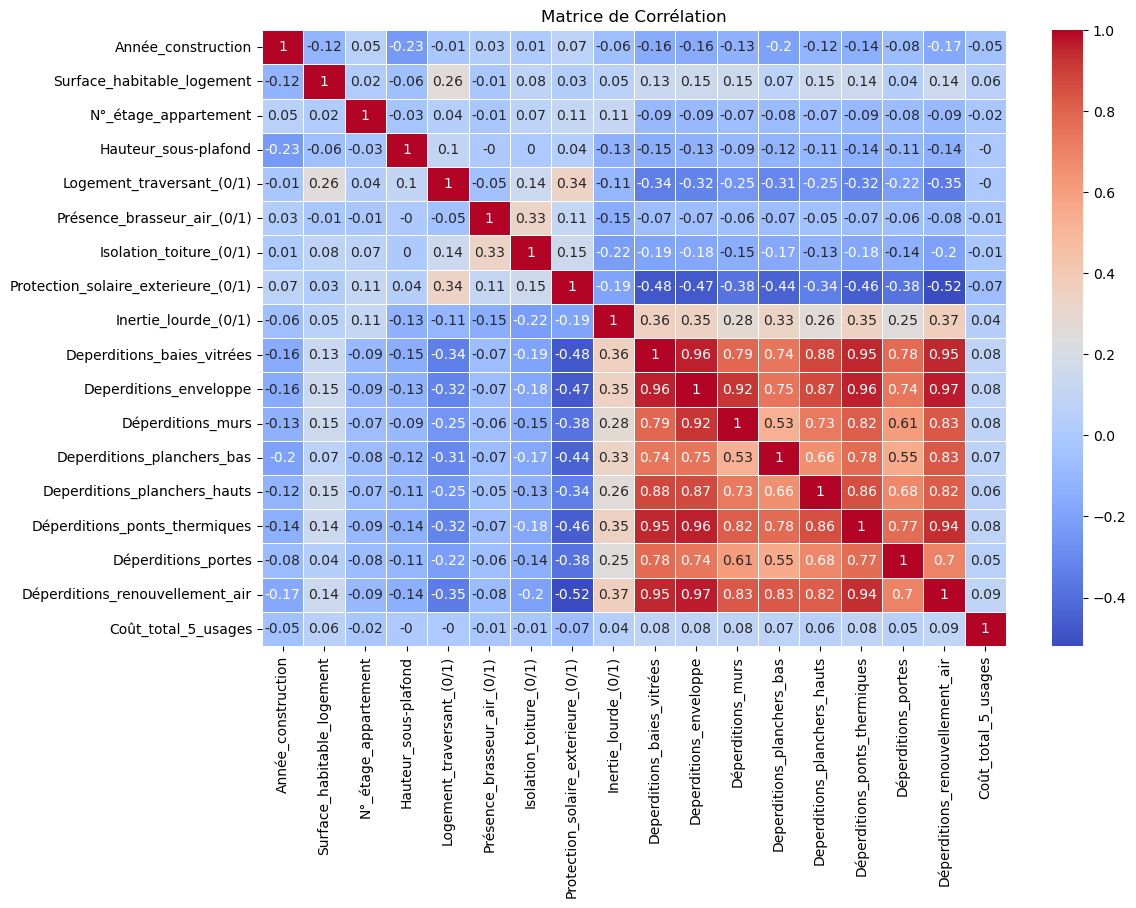

In [ ]:
# Calcul de la matrice de corrélation
corr_matrix = round(df[list(quant_cols) + [target]].corr(), 2)
# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

## Encodage des variables catégorielles

In [174]:
# Concaténer les deux listes : ls_variables_explicatives et target
df = df[list(ls_variables_explicatives) + [target]]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

## Echantillonage